5.Ensemble Models and Bias/Variance Tradeoff (6 points): You are provided with a synthetic function defined as:

f (x) = sin(2πx)

Your goal is to analyze the bias, variance, and mean squared error (MSE) of three models: (i) Decision Tree Regressor, (ii) Random Forest Regressor, (iii) Gradient Boosting Regressor.

5.First, generate 100 training datasets by sampling x ∼ Uniform(0, 1) and computing y = f (x) + ϵ, where ϵ ∼ N (0, 0.32). Create a fixed test set of 1000 evenly spaced points in the interval [0, 1].
For each model, train on each of the 100 datasets, make predictions on the test set, and compute
bias2 (squared difference between the average prediction and the true function), variance (variance
of predictions across datasets), and mean squared error (MSE).

Plot a few representative predictions along with the true function, the average prediction, and bar plots comparing bias2, variance, and MSE across models. Finally, reflect on and explain which model had the lowest bias, which had the lowest variance, and which achieved the lowest MSE. Comment on how bagging (Random Forests) and boosting (Gradient Boosting) affect the bias-variance tradeoff, and describe when you would expect one method to outperform the other in practice.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [ ]:
# True function
def true_function(x):
  return np.sin(2*np.pi*x)

In [ ]:
n_samples = 1000

# generate 1000 samples evenly split between 0 and 1 and reshaping it to make it compatible with pandas
x_test = np.linspace(0,1,n_samples).reshape(-1, 1)

# get true values
y_test = true_function(x_test)

# number of training datasets
n_datasets = 100
# standard deviation for gaussian noise (very high)
std = 0.3
# mean for gaussian noise
mean = 0

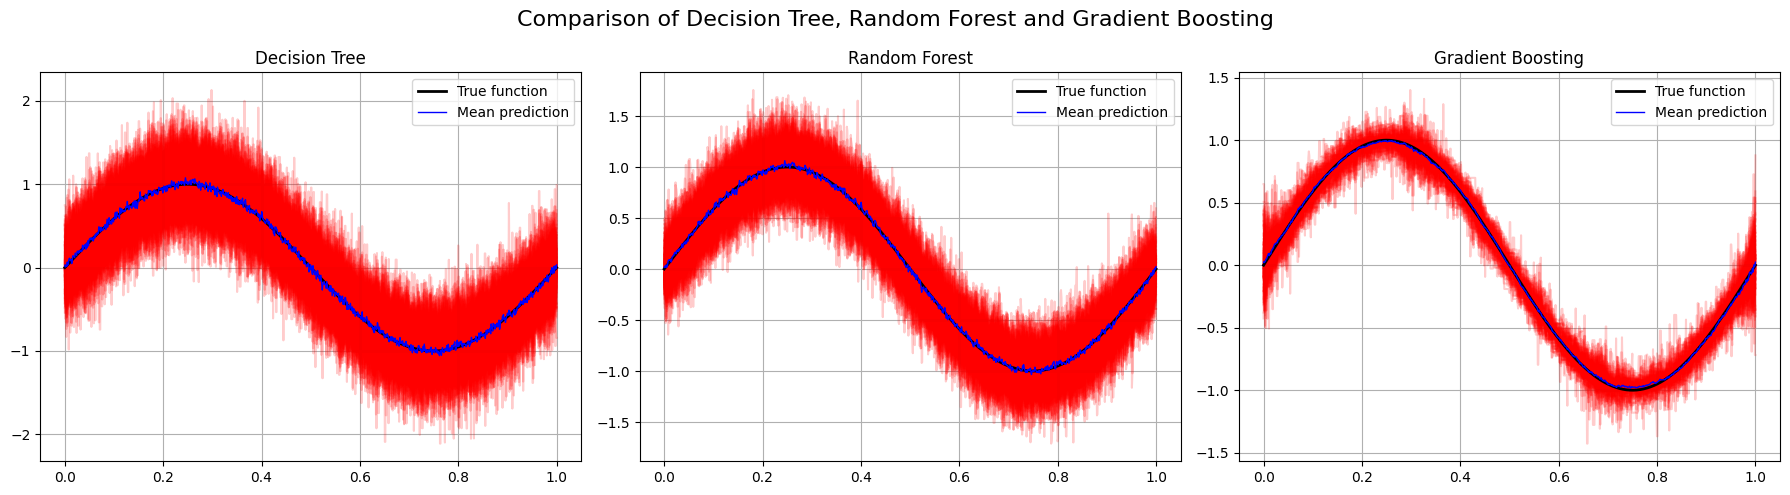

In [ ]:
# creating array for storing predictions of each of the 3 models
DT_predictions = np.zeros((n_datasets,n_samples))

Random_forest_predictions = np.zeros((n_datasets,n_samples))

Gradient_boosting_predictions = np.zeros((n_datasets,n_samples))

bias_variance_mse = []

predictions = [DT_predictions, Random_forest_predictions, Gradient_boosting_predictions]
titles = ["Decision Tree", "Random Forest", "Gradient Boosting"]

# for plotting results
fig, axes = plt.subplots(1,3,figsize=(18,5))

# loop 100 times and store prediction results
for i in range(n_datasets):
  x_train = np.random.uniform(0,1,n_samples)
  y_train = true_function(x_train) + np.random.normal(mean,std, n_samples)
  x_train = x_train.reshape(-1, 1)

  DT_predictions[i] = DecisionTreeRegressor().fit(x_train,y_train).predict(x_test)
  Random_forest_predictions[i] = RandomForestRegressor().fit(x_train,y_train).predict(x_test)
  Gradient_boosting_predictions[i] = GradientBoostingRegressor().fit(x_train,y_train).predict(x_test)

  # plotting results for this iteration
  for j in range(3):
    axes[j].plot(x_test,predictions[j][i], color="red", alpha=0.2)

# Get mean predictions of each model
mean_predictions = [np.mean(predictions[0], axis=0), np.mean(predictions[1], axis=0), np.mean(predictions[2], axis=0)]

# loop 3 times and plot true function and mean prediction, title, legend, grid
for i in range(3):
  # plot true function
  axes[i].plot(x_test,y_test, color="black", label="True function", linewidth=2)
  # plot mean prediction
  axes[i].plot(x_test, mean_predictions[i], color="blue", label="Mean prediction", linewidth=1)

  # title, legend, and grid
  axes[i].set_title(titles[i])
  axes[i].legend()
  axes[i].grid(True)

  # Compute bias, variance, and mean squared error (MSE)
  bias = np.mean((y_test - mean_predictions[i])**2)
  variance = np.mean(np.var(predictions[i], axis=0))
  bias_variance_mse.append([bias, variance, bias + variance])


plt.suptitle("Comparison of Decision Tree, Random Forest and Gradient Boosting", fontsize=16)
plt.tight_layout()
plt.show()

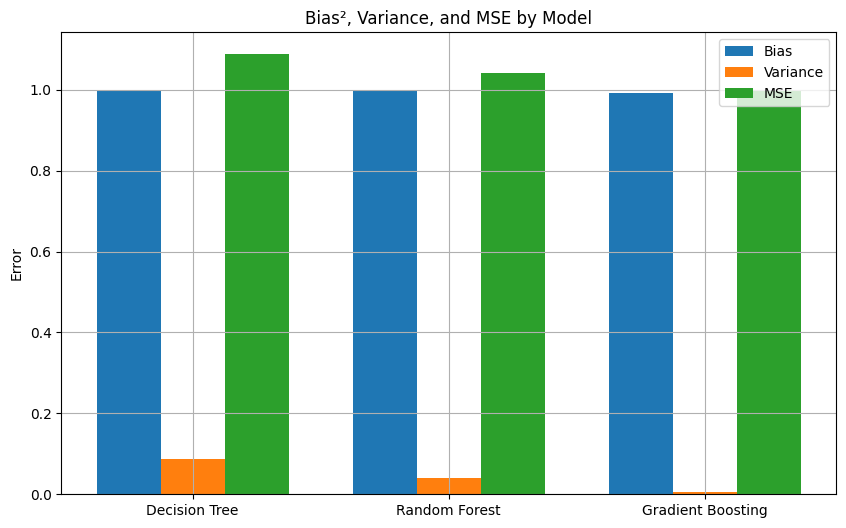

In [ ]:
# making an array for bias, variance, and mse
bias_values = [arr[0] for arr in bias_variance_mse]
variance_values = [arr[1] for arr in bias_variance_mse]
mse_values = [arr[2] for arr in bias_variance_mse]

# Bar plot
x = np.arange(len(titles))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, bias_values, width, label='Bias')
bar2 = ax.bar(x, variance_values, width, label='Variance')
bar3 = ax.bar(x + width, mse_values, width, label='MSE')

ax.set_ylabel('Error')
ax.set_title('Bias², Variance, and MSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()
ax.grid(True)

plt.show()

Here, looking at first graph Decision trees performed the worse then random forest then gradient boosting. Interestingly, gradient boosting actually has less variance than random forest because the training data is very noisy. Gradient boosting usually performs the best in very noisy datasets. However, on low noise datasets, Random forest should perform better at reducing the variance and gradient boosting should perform better in reducing the bias.